## Breast cancer prediction

### Problem Statement

Breast cancer is a type of cancer that develops in the cells of the breasts. It typically starts in the lining cells of the ducts or lobules of the glandular tissue in the breast. In the early stages, breast cancer growth is confined to the duct or lobule and generally causes no symptoms, and has minimal potential for spreading to other parts of the body.

Diagnosing breast cancer involves microscopic analysis of a sample or biopsy of the affected area of the breast. While most types of breast cancer are easy to diagnose through a biopsy, there are some types of breast cancer that require specialized lab exams

This  model is trained for dataset of breast tumor information, including features such as tumor size, shape, and texture. After training,  the performance of  model is evaluated and compared their accuracy in predicting malignant and benign tumors.

### Loading the Dataset

In [1]:
#displaying the content of file
N = 15
with open('C:/Users/lenovo/Documents/Practice/data02.csv', 'r') as f:
    dataset_content = f.readlines()

head_rows = dataset_content[:N]

for row in head_rows:
    columns = row.strip().split(',')
    print(columns)

['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']
['842302', '1', '17.99', '10.38', '122.8', '1001', '0.1184', '0.2776', '0.3001', '0.1471', '0.2419', '0.07871', '1.095', '0.9053', '8.589', '153.4', '0.006399', '0.04904', '0.05373', '0.01587', '0.03003', '0.006193', '25.38', '17.33', '184.6', '2019', '0.1622', '0.6656', '0.7119', '0.2654', '0.4601', '0.1189']
['842517', '1', '20.57', '17.77', '132.9', '1326', '0.08474', '0.07864', '0.0869', '0.07017', '0.1812', '0.05667', '0.5435'

In [2]:
#reading first five lines
with open('C:/Users/lenovo/Documents/Practice/data02.csv', 'r') as f:
    for i in range(5):
        line = f.readline()
        print(line)

id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst

842302,1,17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,1.095,0.9053,8.589,153.4,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189

842517,1,20.57,17.77,132.9,1326,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.0186,0.0134,0.01389,0.003532,24.99,23.41,158.8,1956,0.1238,0.1866,0.2416,0.186,0.275,0.08902

84300903,1,19.69,21.25,130,1203,0.1096,0.1599,0.1974,0.1279,0.2069,0.05999,0.7456,0.7869,4.585,94.

In [3]:
with open('C:/Users/lenovo/Documents/Practice/data02.csv', 'r') as f:
    first_line = f.readline().strip()
    columns = first_line.split(',')
    print(columns)

['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


In [4]:
with open('C:/Users/lenovo/Documents/Practice/data02.csv', 'r') as file:
    length = []
    for line in file:
        values = line.split(',')
        length.append(len(values))
    print("Columns:", max(length))

Columns: 32


In [5]:
#checking missing values

with open('C:/Users/lenovo/Documents/Practice/data02.csv', 'r') as file:
    row_count = 0 
    missing_values_count = 0
    
    for line in file:
        if row_count == 0:
            row_count += 1
            continue
        values = line.strip().split(',')
        
        for value in values:
            if value == '' or value == 'na': 
                missing_values_count += 1
        
        row_count += 1

print("Total missing values:", missing_values_count)

Total missing values: 0


In [6]:
with open('C:/Users/lenovo/Documents/Practice/data.csv', 'r') as file:
    row_count = 0

    values = []
    q1_values = []
    q3_values = []

    for line in file:
        if row_count == 0:
            row_count += 1
            continue
        row_values = line.strip().split(',')

        for value in row_values:
            values.append(float(value))
        row_count += 1

    sorted_values = sorted(values)

    n = len(sorted_values)
    q1_index = int(n / 4)
    q3_index = int(3 * n / 4)
    q1 = sorted_values[q1_index]
    q3 = sorted_values[q3_index]

    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    outlier_count = 0
    for value in values:
        if value < lower_bound or value > upper_bound:
            outlier_count += 1
    print('Outlier count:', outlier_count)


Outlier count: 2997


In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv("C:/Users/lenovo/Documents/Practice/data02.csv")

In [12]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

<AxesSubplot:>

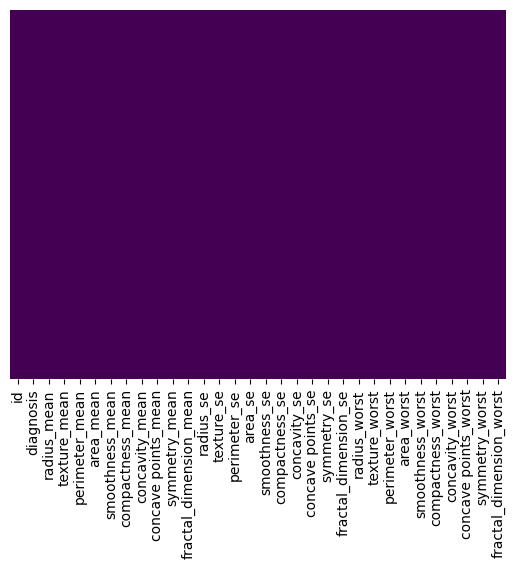

In [13]:
#create a simple heatmap to see for missing data!
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

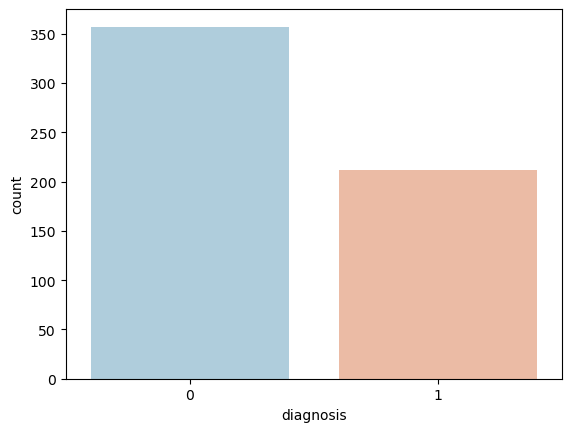

In [14]:
sns.countplot(x= 'diagnosis',data=df,palette='RdBu_r')

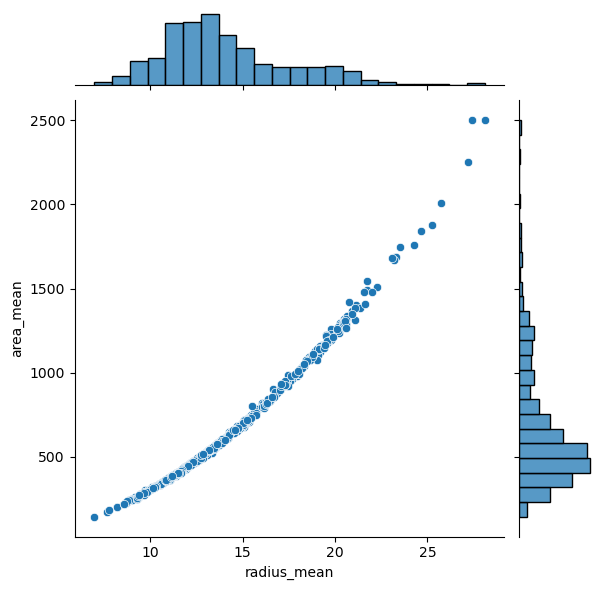

In [15]:
sns.jointplot(x = df['radius_mean'], y = df['area_mean'], kind = 'scatter')

In [16]:
df.dtypes

id                           int64
diagnosis                    int64
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

<AxesSubplot:xlabel='smoothness_mean', ylabel='Count'>

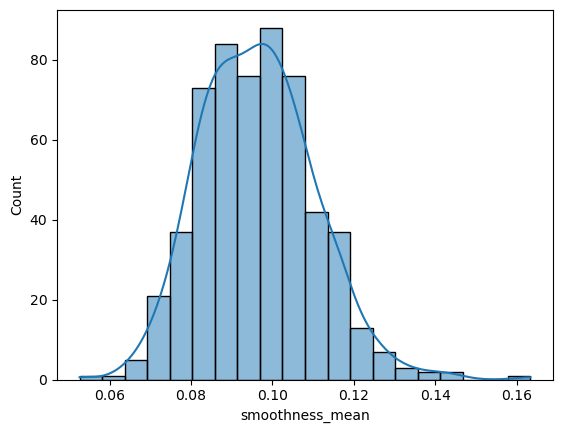

In [17]:
sns.histplot(data=df, x='smoothness_mean', bins=20, kde=True)

In [20]:
df.describe()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


texture_mean: Lower Bound = 7.73, Upper Bound = 30.24


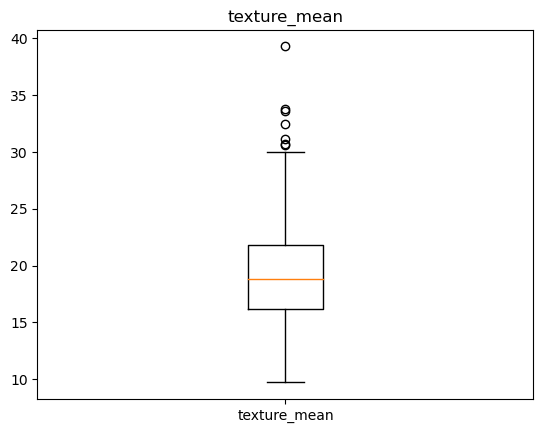

area_mean: Lower Bound = -123.30, Upper Bound = 1326.30


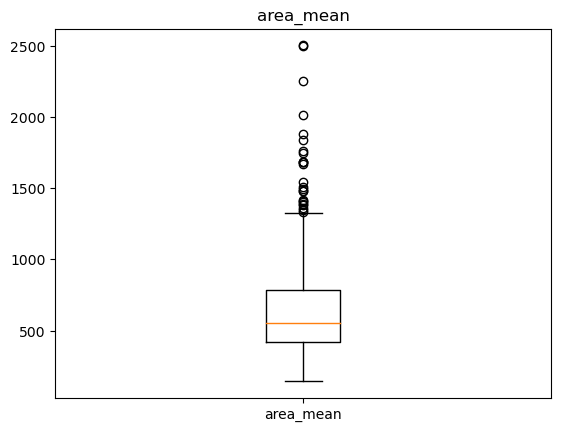

smoothness_mean: Lower Bound = 0.06, Upper Bound = 0.13


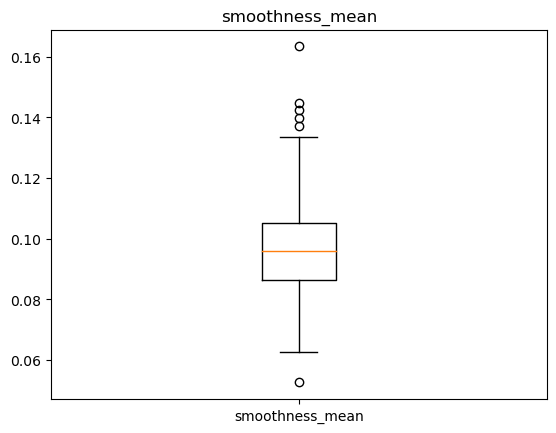

concavity_mean: Lower Bound = -0.12, Upper Bound = 0.28


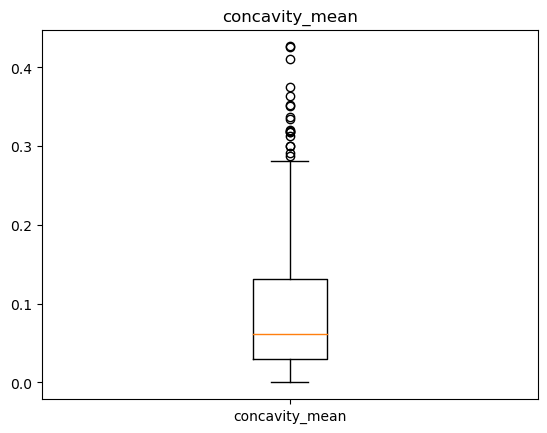

symmetry_mean: Lower Bound = 0.11, Upper Bound = 0.25


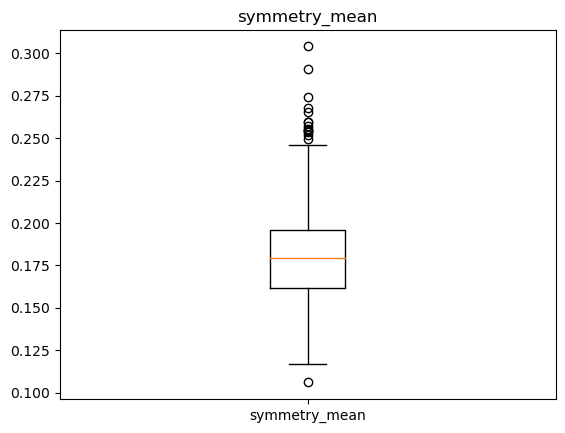

fractal_dimension_mean: Lower Bound = 0.05, Upper Bound = 0.08


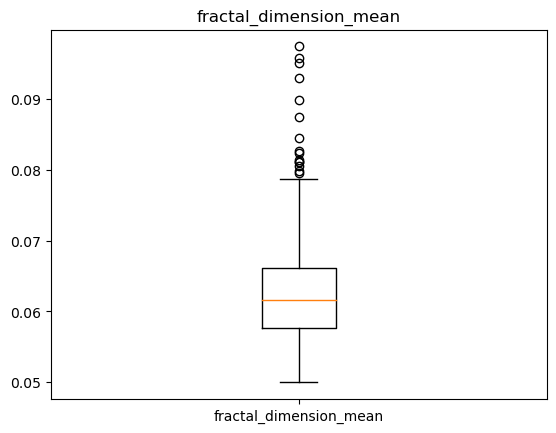

texture_se: Lower Bound = -0.13, Upper Bound = 2.43


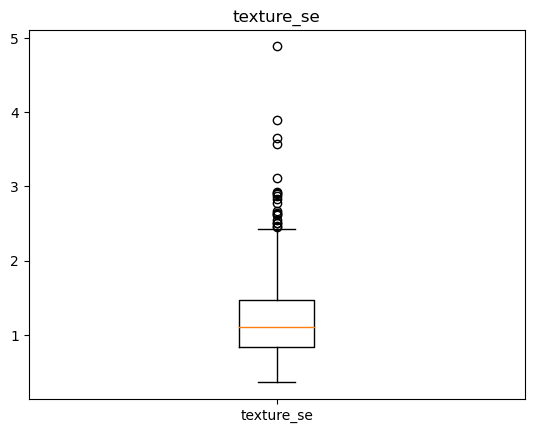

area_se: Lower Bound = -23.16, Upper Bound = 86.20


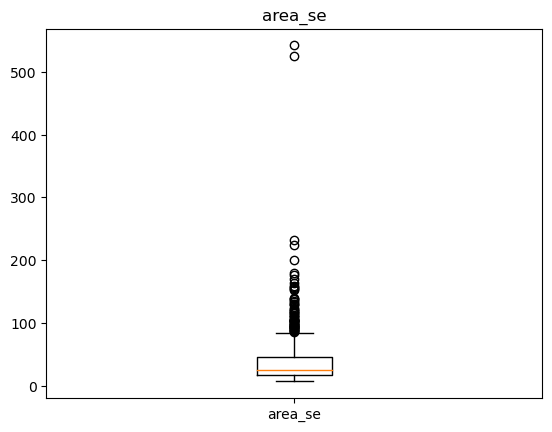

smoothness_se: Lower Bound = 0.00, Upper Bound = 0.01


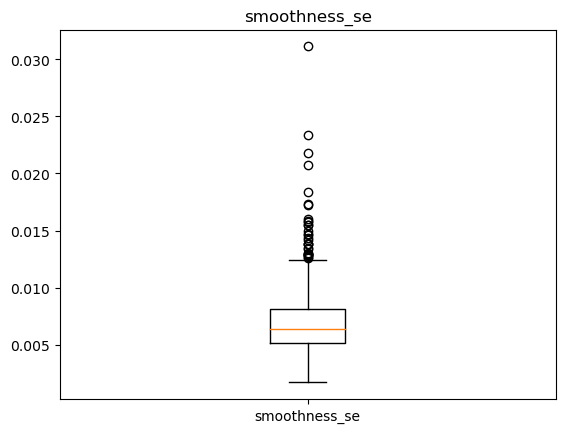

concavity_se: Lower Bound = -0.03, Upper Bound = 0.08


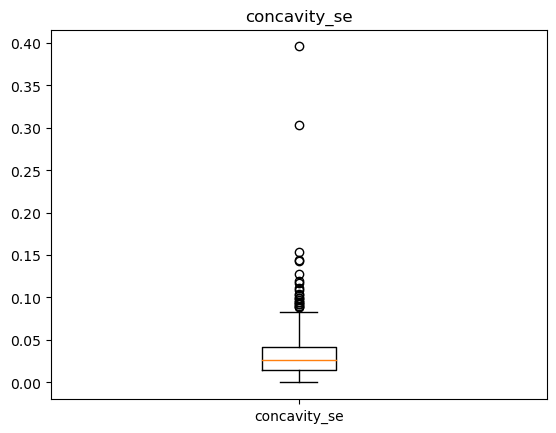

symmetry_se: Lower Bound = 0.00, Upper Bound = 0.04


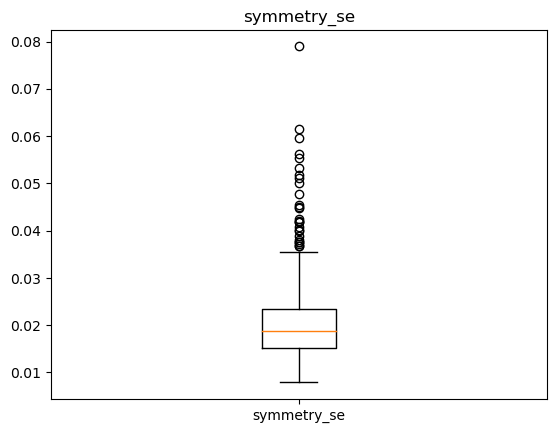

fractal_dimension_se: Lower Bound = -0.00, Upper Bound = 0.01


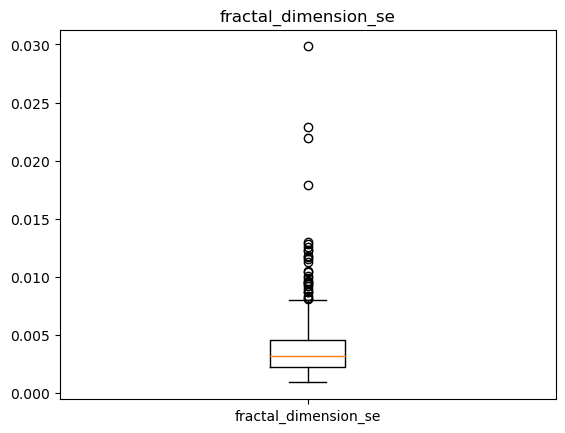

smoothness_worst: Lower Bound = 0.07, Upper Bound = 0.19


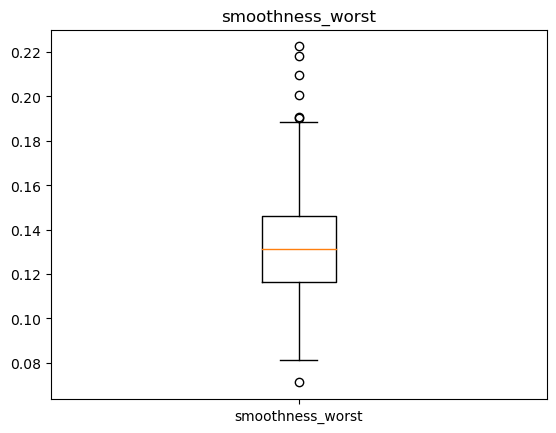

concavity_worst: Lower Bound = -0.29, Upper Bound = 0.79


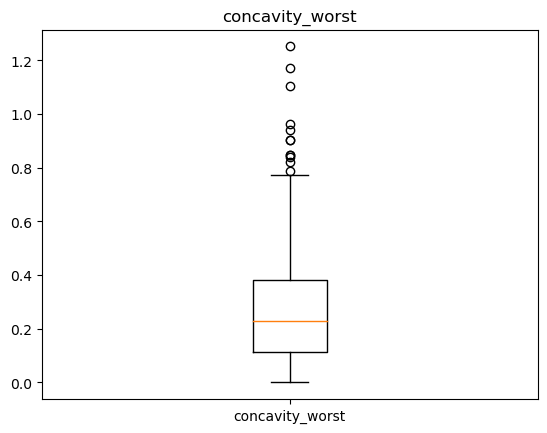

symmetry_worst: Lower Bound = 0.15, Upper Bound = 0.42


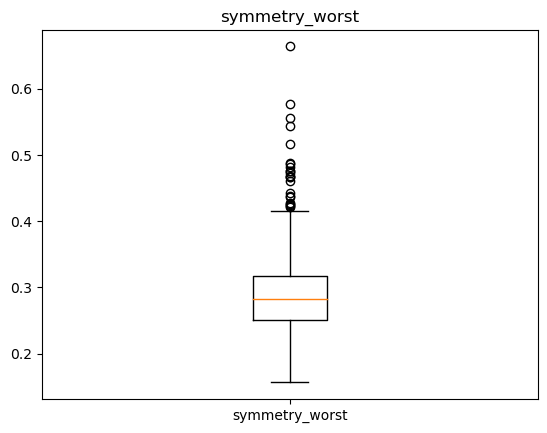

fractal_dimension_worst: Lower Bound = 0.04, Upper Bound = 0.12


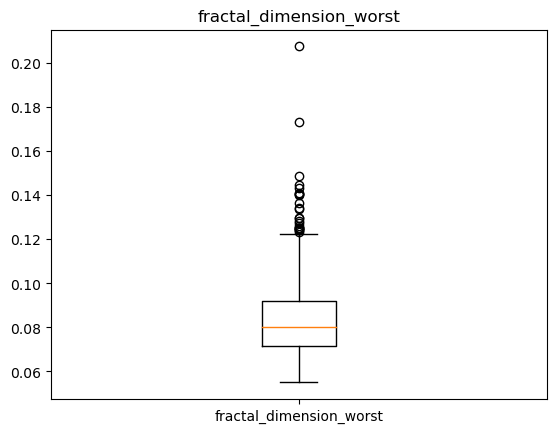

In [21]:
import csv
import matplotlib.pyplot as plt

# Load the data from the CSV file
with open('C:/Users/lenovo/Documents/Practice/data02.csv', 'r') as f:
    reader = csv.reader(f)
    header = next(reader)
    data = [list(map(float, row)) for row in reader]

# Define the columns to plot
cols = [ 'texture_mean', 'area_mean', 'smoothness_mean',
       'concavity_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'texture_se', 'area_se', 'smoothness_se', 'concavity_se', 'symmetry_se',
       'fractal_dimension_se', 'smoothness_worst', 'concavity_worst',
       'symmetry_worst', 'fractal_dimension_worst']


# Loop through each column and create a box plot
for col in cols:
    # Sort the data for the current column
    sorted_data = sorted([row[header.index(col)] for row in data])
    
    # Calculate the median and quartiles for the current column
    n = len(sorted_data)
    q1 = sorted_data[n//4]
    median = sorted_data[n//2]
    q3 = sorted_data[n//4*3]
    
    # Calculate the interquartile range (IQR) for the current column
    iqr = q3 - q1
    
    # Define the lower and upper bounds for outliers
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    # Print the lower and upper bounds for outliers
    print('{}: Lower Bound = {:.2f}, Upper Bound = {:.2f}'.format(col, lower_bound, upper_bound))
    
    # Create a box plot for the current column
    fig, ax = plt.subplots()
    ax.boxplot(sorted_data)
    ax.set_title(col)
    ax.set_xticklabels([col])
    plt.show()

In [22]:
import csv

# Load the data from the CSV file
with open('C:/Users/lenovo/Documents/Practice/data02.csv', 'r') as f:
    reader = csv.reader(f)
    header = next(reader)
    data = [list(map(float, row)) for row in reader]

# Define the columns to clean
cols = ['texture_mean', 'area_mean', 'smoothness_mean',
       'concavity_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'texture_se', 'area_se', 'smoothness_se', 'concavity_se', 'symmetry_se',
       'fractal_dimension_se', 'smoothness_worst', 'concavity_worst',
       'symmetry_worst', 'fractal_dimension_worst']


# Loop through each column and remove outliers
for col in cols:
    # Sort the data for the current column
    sorted_data = sorted([row[header.index(col)] for row in data])
    
    # Calculate the median and quartiles for the current column
    n = len(sorted_data)
    q1 = sorted_data[n//4]
    median = sorted_data[n//2]
    q3 = sorted_data[n//4*3]
    
    # Calculate the interquartile range (IQR) for the current column
    iqr = q3 - q1
    
    # Define the lower and upper bounds for outliers
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    # Remove the outliers for the current column
    data = [row for row in data if row[header.index(col)] >= lower_bound and row[header.index(col)] <= upper_bound]

# Write the cleaned data to a new CSV file
with open('cleaned_data.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(header)
    writer.writerows(data)

print('Cleaned dataset saved to cleaned_data.csv')

Cleaned dataset saved to cleaned_data.csv


In [23]:
df2 = pd.read_csv('cleaned_data.csv')
df2.shape

(349, 32)

In [18]:
features = df.columns
nb_train = int(np.floor(0.7 * len(df)))
df = df.sample(frac=1, random_state=1)
X_train = df[features][:nb_train]
y_train = df['diagnosis'][:nb_train].values
X_test = df[features][nb_train:]
y_test = df['diagnosis'][nb_train:].values

In [1]:

import numpy as np
from collections import Counter


class Node:
    '''
    Helper class which implements a single tree node.
    '''
    def __init__(self, feature=None, threshold=None, data_left=None, data_right=None, gain=None, value=None):
        self.feature = feature
        self.threshold = threshold
        self.data_left = data_left
        self.data_right = data_right
        self.gain = gain
        self.value = value

In [2]:

class DecisionTree:
    '''
    Class which implements a decision tree classifier algorithm.
    '''
    def __init__(self, min_samples_split=2, max_depth=5):
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.root = None
        
    @staticmethod
    def _entropy(s):
        '''
        Helper function, calculates entropy from an array of integer values.
        
        :param s: list
        :return: float, entropy value
        '''
        # Convert to integers to avoid runtime errors
        counts = np.bincount(np.array(s, dtype=np.int64))
        # Probabilities of each class label
        percentages = counts / len(s)

        # Caclulate entropy
        entropy = 0
        for pct in percentages:
            if pct > 0:
                entropy += pct * np.log2(pct)
        return -entropy
    
    def _information_gain(self, parent, left_child, right_child):
        '''
        Helper function, calculates information gain from a parent and two child nodes.
        
        :param parent: list, the parent node
        :param left_child: list, left child of a parent
        :param right_child: list, right child of a parent
        :return: float, information gain
        '''
        num_left = len(left_child) / len(parent)
        num_right = len(right_child) / len(parent)
        
        # One-liner which implements the previously discussed formula
        return self._entropy(parent) - (num_left * self._entropy(left_child) + num_right * self._entropy(right_child))
    
    def _best_split(self, X, y):
        '''
        Helper function, calculates the best split for given features and target
        
        :param X: np.array, features
        :param y: np.array or list, target
        :return: dict
        '''
        best_split = {}
        best_info_gain = -1
        n_rows, n_cols = X.shape
        
        # For every dataset feature
        for f_idx in range(n_cols):
            X_curr = X[:, f_idx]
            # For every unique value of that feature
            for threshold in np.unique(X_curr):
                # Construct a dataset and split it to the left and right parts
                # Left part includes records lower or equal to the threshold
                # Right part includes records higher than the threshold
                df = np.concatenate((X, y.reshape(1, -1).T), axis=1)
                df_left = np.array([row for row in df if row[f_idx] <= threshold])
                df_right = np.array([row for row in df if row[f_idx] > threshold])

                # Do the calculation only if there's data in both subsets
                if len(df_left) > 0 and len(df_right) > 0:
                    # Obtain the value of the target variable for subsets
                    y = df[:, -1]
                    y_left = df_left[:, -1]
                    y_right = df_right[:, -1]

                    # Caclulate the information gain and save the split parameters
                    # if the current split if better then the previous best
                    gain = self._information_gain(y, y_left, y_right)
                    if gain > best_info_gain:
                        best_split = {
                            'feature_index': f_idx,
                            'threshold': threshold,
                            'df_left': df_left,
                            'df_right': df_right,
                            'gain': gain
                        }
                        best_info_gain = gain
        return best_split
    
    def _build(self, X, y, depth=0):
        '''
        Helper recursive function, used to build a decision tree from the input data.
        
        :param X: np.array, features
        :param y: np.array or list, target
        :param depth: current depth of a tree, used as a stopping criteria
        :return: Node
        '''
        n_rows, n_cols = X.shape
        
        # Check to see if a node should be leaf node
        if n_rows >= self.min_samples_split and depth <= self.max_depth:
            # Get the best split
            best = self._best_split(X, y)
            # If the split isn't pure
            if best['gain'] > 0:
                # Build a tree on the left
                left = self._build(
                    X=best['df_left'][:, :-1], 
                    y=best['df_left'][:, -1], 
                    depth=depth + 1
                )
                right = self._build(
                    X=best['df_right'][:, :-1], 
                    y=best['df_right'][:, -1], 
                    depth=depth + 1
                )
                return Node(
                    feature=best['feature_index'], 
                    threshold=best['threshold'], 
                    data_left=left, 
                    data_right=right, 
                    gain=best['gain']
                )
        # Leaf node - value is the most common target value 
        return Node(
            value=Counter(y).most_common(1)[0][0]
        )
    
    def fit(self, X, y):
        '''
        Function used to train a decision tree classifier model.
        
        :param X: np.array, features
        :param y: np.array or list, target
        :return: None
        '''
        # Call a recursive function to build the tree
        self.root = self._build(X, y)
        
    def _predict(self, x, tree):
        '''
        Helper recursive function, used to predict a single instance (tree traversal).
        
        :param x: single observation
        :param tree: built tree
        :return: float, predicted class
        '''
        # Leaf node
        if tree.value != None:
            return tree.value
        feature_value = x[tree.feature]
        
        # Go to the left
        if feature_value <= tree.threshold:
            return self._predict(x=x, tree=tree.data_left)
        
        # Go to the right
        if feature_value > tree.threshold:
            return self._predict(x=x, tree=tree.data_right)
        
    def predict(self, X):
        '''
        Function used to classify new instances.
        
        :param X: np.array, features
        :return: np.array, predicted classes
        '''
        # Call the _predict() function for every observation
        return [self._predict(x, self.root) for x in X]


Performed Cross validation and took the datset and again fitted in model

In [1]:
# Select the best split point for a dataset
def get_split(dataset, n_features):
    class_values = list(set(row[-1] for row in dataset))
    b_index, b_value, b_score, b_groups = 999, 999, 999, None
    features = list()
    while len(features) < n_features:
        index = randrange(len(dataset[0])-1)
        if index not in features:
            features.append(index)
    for index in features:
        for row in dataset:
            groups = test_split(index, row[index], dataset)
            gini = gini_index(groups, class_values)
            if gini < b_score:
                b_index, b_value, b_score, b_groups = index, row[index], gini, groups
    return {'index':b_index, 'value':b_value, 'groups':b_groups}

In [2]:
from random import randrange

def cross_validation_split(dataset, n_folds):
    dataset_split = list()
    dataset_copy = list(dataset)
    fold_size = int(len(dataset) / n_folds)
    for i in range(n_folds):
        fold = list()
        while len(fold) < fold_size:
            index = randrange(len(dataset_copy))
            fold.append(dataset_copy.pop(index))
        dataset_split.append(fold)
    return dataset_split

In [18]:
import numpy as np 
from collections import Counter

def bootstrap_sample(X, y):
    n_samples = X.shape[0]
    idxs = np.random.choice(n_samples, n_samples, replace=True)
    return X[idxs], y[idxs]

def most_common_label(y):
    counter = Counter(y)
    most_common = counter.most_common(1)[0][0]
    return most_common

class RandomForest:
    def __init__(self, n_trees=10, min_samples_split=2,
                 max_depth=100):
        self.n_trees = n_trees
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.trees = []

    def fit(self, X, y):
        self.trees = []
        for _ in range(self.n_trees):
            tree = DecisionTree(min_samples_split=self.min_samples_split,
                                max_depth=self.max_depth)
            X_samp, y_samp = bootstrap_sample(X, y)
            tree.fit(X_samp, y_samp)
            self.trees.append(tree)

    def predict(self, X):
        tree_preds = np.array([tree.predict(X) for tree in self.trees])
        tree_preds = np.swapaxes(tree_preds, 0, 1)
        y_pred = [most_common_label(tree_pred) for tree_pred in tree_preds]
        return np.array(y_pred)


def accuracy(y_true, y_pred):   
    accuracy = np.sum(y_true == y_pred)/len(y_true)   
    return accuracy


X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=123)
clf = RandomForest(n_trees = 3)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_train) 
acc1 = accuracy(y_train, y_pred)
print("Training Accuracy: ", acc1)

y_pred = clf.predict(X_test)
acc2 = accuracy(y_test, y_pred)
print("Testing Accuracy: ", acc2)


Training Accuracy:  0.9798994974874372
Testing Accuracy:  0.9415204678362573
